## Heart Disease Prediction Analysis 
-----------------------

### Introduction

Machine learning has become increasingly prominent in the heahlthcare industy; healthcare data helps build a decision support system through the integration of AI and domain level knowledge, that allows medical professionals to detect and cater to patients needs' rapidly (Sadar et al. 2023). Advancements in Machine Learning and AI have created large scale efforts to improve heart disease prediction using computational techniques (Mohapatra et al. 2022). Building an effective Machine Learning algorithm that readily predicts heart disease amidst patients would be both a scientific and economically proliferating instrument. Using the *heart disease prediction data* set a comparative analysis between various models is done to deliberate on the best performing model - one that obtains the highest accuracy. 


====================================================================================

7 = reversable defect


### Model training 

The purpose of this notebook is to implement machine learning algorithms to explore the data and build a model that can accurately predict the presence of heart disease in patients. Since this is a classification issue, the group focused on the mandatory models such as Logistic Regression, Decision Tree and ANN, before focusing on additional models such as Random Forest Classifier, XGB Boost and so on. 

The data introduces various input variables ranging from demographic to clinical information. The target variable (Heart Disease) represents a binary value, with 1 being Heart Disease present, and 0 being absent. For further ilucidation, each of the variables are delineated as follows, 


1.	Age: in years
2.	Sex: 1 = male; 0 = female
3.	Chest pain type:
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
4.	BP: resting blood pressure (in mm Hg on admission to the hospital)
5.	Cholesterol: serum cholestoral in mg/dl
6.	FBS: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7.	EKG results: resting electrocardiographic results
Value 0: normal
Value 1: aving ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.	Max HR: maximum heart rate achieved
9.	Exercise angina: exercise induced angina (1 = yes; 0 = no)
10.	Slope of ST: oldpeak = ST depression induced by exercise relative to rest
11.	Number of vessels fluro: number of major vessels (0-3) colored by flourosopy
12.	Thallium: 3 = normal. 
      6 = fixed defect. 
      7
= reversable defect
d defect. 
      7 = reversable defect

The following steps were used to prepare the dataset and train the model. 

#### **Step 1: Importing librarires**


In [7]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from operator import itemgetter
from sklearn import metrics # Use the sklearn library's metrics module
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor 
import warnings
warnings.filterwarnings("ignore")

#### **Step 2: Loading dataset**


In [9]:
df = pd.read_csv("/Users/arshzair/Desktop/Australia Documents/UNSW/2024/Term 3'24/INFS 5720/Assignment file /Group Assignment /Ke Chen Data/Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


#### **Step 3: Data Preprocessing**
Prior to commencing with analysis, the data went through comprehensive data cleaning processes such that optimal results can be obtained. Inconsistencies and null values were observed and dealt with accordingly. The data was scaled to accomodate models that are strongly dependent on uniformtiy of data ranges for their predictive performances. These steps are vital to ensure that predictive performance of the models are uninterrupted and apt.     

In [11]:
df.isnull().values.any()

False

In [12]:
missing_values = df.isnull().sum()

missing_values

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [13]:
#encoding categorial variables

label = LabelEncoder()

df['Heart Disease'] = label.fit_transform(df['Heart Disease'])

categorical_columns = ['Chest pain type', 'EKG results', 'Slope of ST', 'Thallium']

for col in categorical_columns:
    df[col] = label.fit_transform(df[col])

df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,3,130,322,0,2,109,0,2.4,1,3,0,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,2,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,2,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,2,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,0,0


In [14]:
#normalising numerical variables

scaler = StandardScaler()

numerical_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.712094,1,3,-0.075410,1.402212,0,2,-1.759208,0,1.181012,1,3,0,1
1,1.382140,0,2,-0.916759,6.093004,0,2,0.446409,0,0.481153,1,0,2,0
2,0.282294,1,1,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,0,0,2,1
3,1.052186,1,3,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,1,1,2,0
4,2.152032,0,1,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,0,1,0,0


#### Step 4: Data Exploration
Rudimentary statistical analysis was done to observe the spread of the data, including mean values of each column, graphical representation of the data ranges as well as frequency distribution. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    float64
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    float64
 4   Cholesterol              270 non-null    float64
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    float64
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(5), int64(9)
me

In [17]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [18]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,2.700000e+02,270.000000,270.000000,2.700000e+02,2.700000e+02,270.000000,270.000000,2.700000e+02,270.000000,2.700000e+02,270.000000,270.000000,270.000000,270.000000
mean,3.667848e-16,0.677778,2.174074,5.682697e-16,-2.467162e-16,0.148148,1.022222,2.631640e-17,0.329630,-5.263280e-17,0.585185,0.670370,0.822222,0.444444
std,1.001857e+00,0.468195,0.950090,1.001857e+00,1.001857e+00,0.355906,0.997891,1.001857e+00,0.470952,1.001857e+00,0.614390,0.943896,0.959140,0.497827
min,-2.797275e+00,0.000000,0.000000,-2.094649e+00,-2.396942e+00,0.000000,0.000000,-3.402609e+00,0.000000,-9.185652e-01,0.000000,0.000000,0.000000,0.000000
25%,-7.075676e-01,0.000000,2.000000,-6.363095e-01,-7.105825e-01,0.000000,0.000000,-7.212705e-01,0.000000,-9.185652e-01,0.000000,0.000000,0.000000,0.000000
50%,6.232461e-02,1.000000,2.000000,-7.540984e-02,-9.031247e-02,0.000000,2.000000,1.653012e-01,0.000000,-2.187060e-01,1.000000,0.000000,0.000000,0.000000
75%,7.222322e-01,1.000000,3.000000,4.854898e-01,5.881079e-01,0.000000,2.000000,7.058937e-01,1.000000,4.811532e-01,1.000000,1.000000,2.000000,1.000000
max,2.481986e+00,1.000000,3.000000,3.850888e+00,6.093004e+00,1.000000,2.000000,2.262800e+00,1.000000,4.505343e+00,2.000000,3.000000,2.000000,1.000000


In [19]:
mean_values = df[numerical_columns].mean()
print("Mean values of numerical columns:")
print(mean_values)

Mean values of numerical columns:
Age              3.667848e-16
BP               5.682697e-16
Cholesterol     -2.467162e-16
Max HR           2.631640e-17
ST depression   -5.263280e-17
dtype: float64


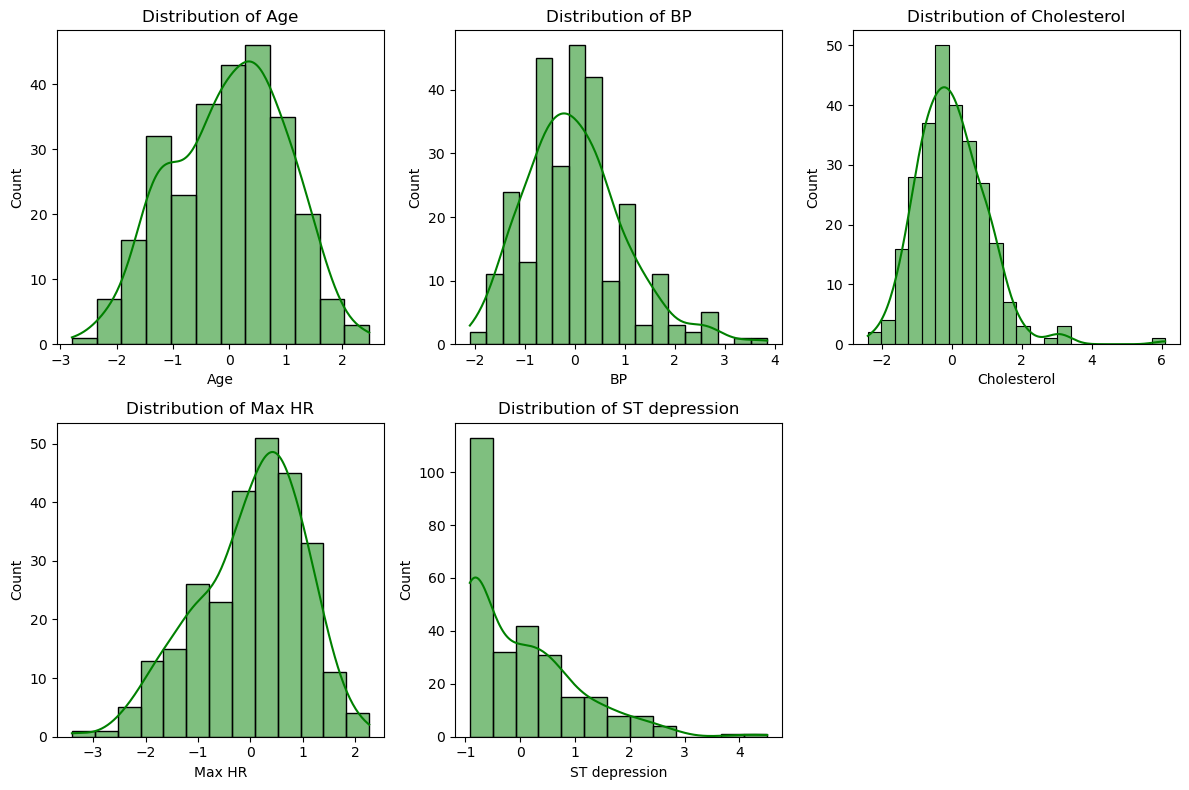

In [20]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, color ='green')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [21]:
categorical_columns = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

for col in categorical_columns:
    print(f"\nFrequency distribution for {col}:")
    print(df[col].value_counts())

print("\nStatistical Summary:")
print(df.describe())


Frequency distribution for Sex:
Sex
1    183
0     87
Name: count, dtype: int64

Frequency distribution for Chest pain type:
Chest pain type
3    129
2     79
1     42
0     20
Name: count, dtype: int64

Frequency distribution for FBS over 120:
FBS over 120
0    230
1     40
Name: count, dtype: int64

Frequency distribution for EKG results:
EKG results
2    137
0    131
1      2
Name: count, dtype: int64

Frequency distribution for Exercise angina:
Exercise angina
0    181
1     89
Name: count, dtype: int64

Frequency distribution for Slope of ST:
Slope of ST
0    130
1    122
2     18
Name: count, dtype: int64

Frequency distribution for Number of vessels fluro:
Number of vessels fluro
0    160
1     58
2     33
3     19
Name: count, dtype: int64

Frequency distribution for Thallium:
Thallium
0    152
2    104
1     14
Name: count, dtype: int64

Frequency distribution for Heart Disease:
Heart Disease
0    150
1    120
Name: count, dtype: int64

Statistical Summary:
                Ag

#### **Step 5: Feature Selection**

Given the small number of entries within the dataset in comparison to the number of features, Random Forest Classifier was utilised to see which features rank higher in terms of its influence on the output variable (Heart Disease). Additionally, the correlation matrix was reflected on to see whether there are certain variables that have greater correlation to eachother than others. 

In [23]:
inputs=df.drop(['Heart Disease'],axis=1)
target=df['Heart Disease']

n_features_to_select = 1
Classifier = RandomForestClassifier(n_estimators=100, max_depth=10)
rfe = RFE(Classifier, n_features_to_select=n_features_to_select)
rfe.fit(inputs,target)

RFE(estimator=RandomForestClassifier(max_depth=10), n_features_to_select=1)

In [24]:
features = inputs.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 Max HR
2 ST depression
3 Cholesterol
4 Thallium
5 Chest pain type
6 Number of vessels fluro
7 Age
8 BP
9 Exercise angina
10 Slope of ST
11 Sex
12 EKG results
13 FBS over 120


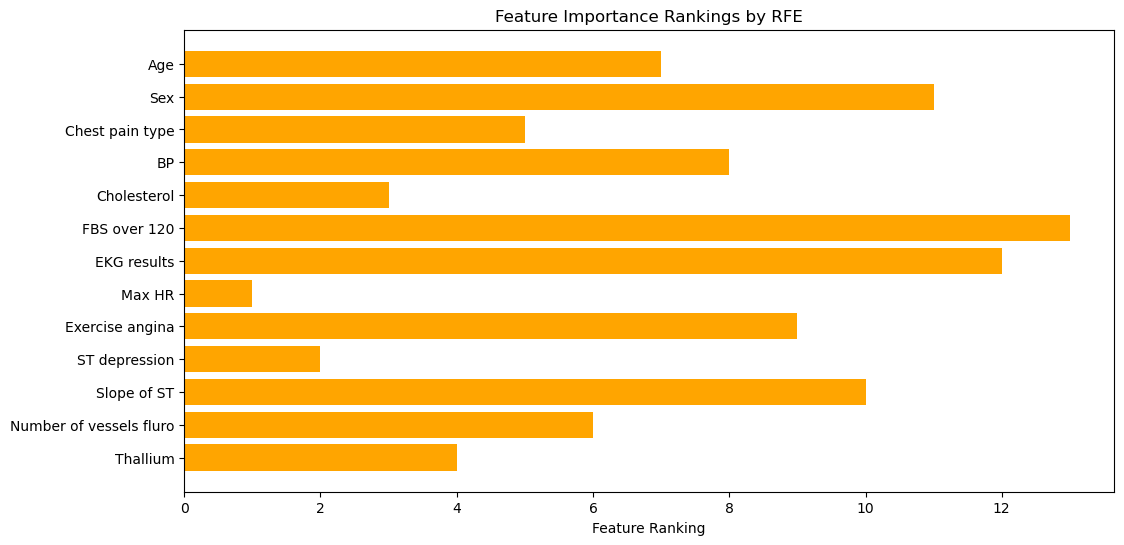

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the rankings and plot them
rankings = rfe.ranking_
plt.figure(figsize=(12, 6))
plt.barh(features, rankings, align='center', color='orange')
plt.xlabel('Feature Ranking')
plt.title('Feature Importance Rankings by RFE')
plt.gca().invert_yaxis()  # Invert y-axis to show the best-ranked feature on top
plt.show()

 It can be seen that 'Sex', 'EKG results' and 'FBS over 120' rank quite low, however to deliberate whether to drop these features, the correlation matrix will be utilised.  

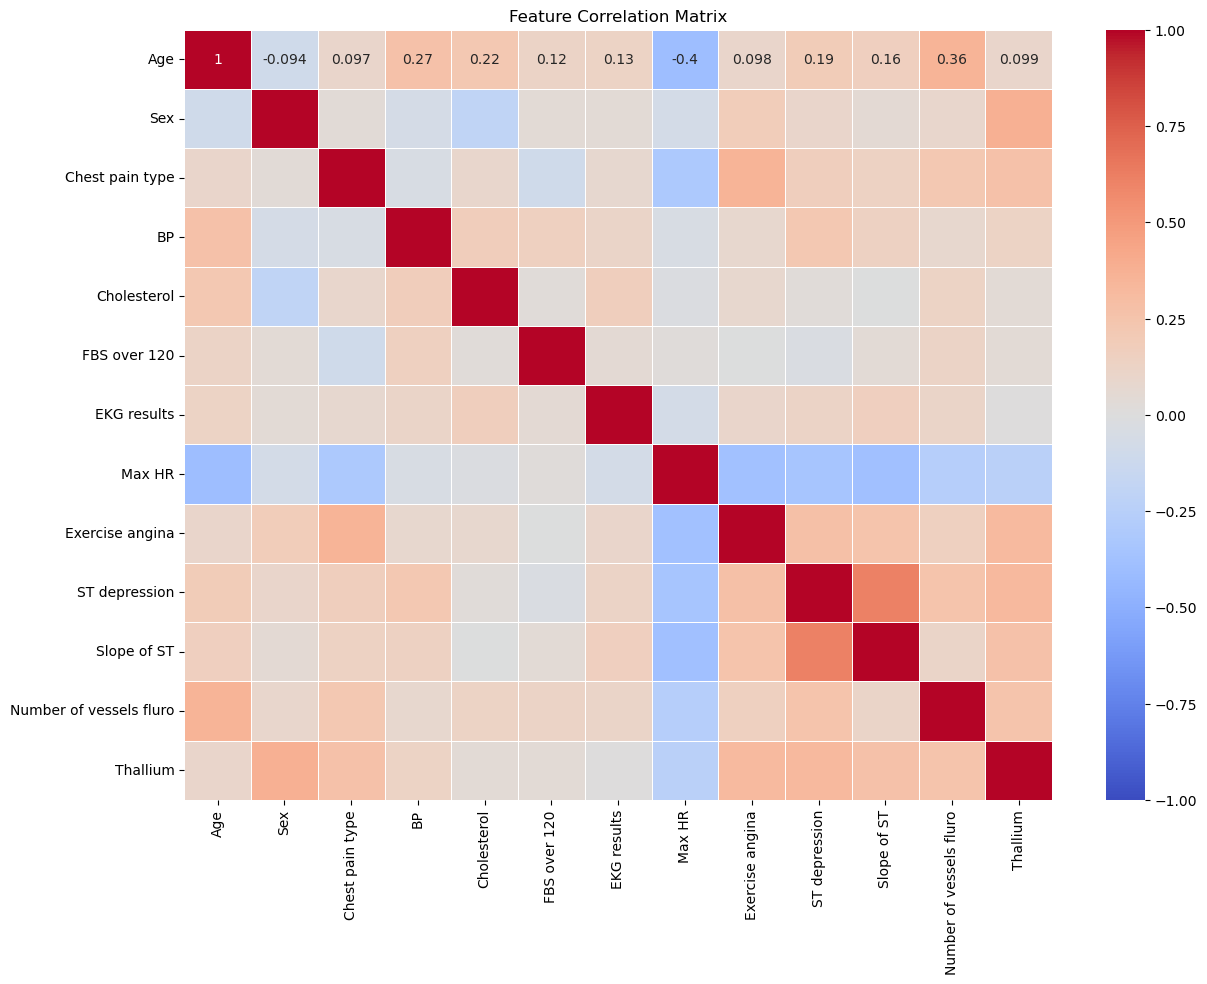

In [27]:
correlation_matrix = inputs.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

It was observed that  some variables such as ST depression and Slopes of ST have a strong correlation, and given the low rank of "Slope of ST", the feature was dropped. 

In [29]:
df = df.drop(["Slope of ST"],axis=1)
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,Thallium,Heart Disease
0,1.712094,1,3,-0.075410,1.402212,0,2,-1.759208,0,1.181012,3,0,1
1,1.382140,0,2,-0.916759,6.093004,0,2,0.446409,0,0.481153,0,2,0
2,0.282294,1,1,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,0,2,1
3,1.052186,1,3,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,1,2,0
4,2.152032,0,1,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,2,2.280369,-0.981951,1,0,0.532904,0,-0.481153,0,2,0
266,-1.147506,1,1,-0.636310,0.258589,0,0,1.008625,0,-0.918565,0,2,0
267,0.172309,0,1,0.485490,0.859476,0,2,0.143677,0,0.218706,0,0,0
268,0.282294,1,3,0.485490,-1.117635,0,0,-0.072560,0,-0.568636,0,1,0


In [30]:
df.columns = df.columns.str.replace(' ', '_')
df

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Number_of_vessels_fluro,Thallium,Heart_Disease
0,1.712094,1,3,-0.075410,1.402212,0,2,-1.759208,0,1.181012,3,0,1
1,1.382140,0,2,-0.916759,6.093004,0,2,0.446409,0,0.481153,0,2,0
2,0.282294,1,1,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,0,2,1
3,1.052186,1,3,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,1,2,0
4,2.152032,0,1,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,2,2.280369,-0.981951,1,0,0.532904,0,-0.481153,0,2,0
266,-1.147506,1,1,-0.636310,0.258589,0,0,1.008625,0,-0.918565,0,2,0
267,0.172309,0,1,0.485490,0.859476,0,2,0.143677,0,0.218706,0,0,0
268,0.282294,1,3,0.485490,-1.117635,0,0,-0.072560,0,-0.568636,0,1,0


#### **Step 6: Splitting data for training models** 

30% of the data was reserved for testing, and random state was utilised to ensure replicability of the dataset. 

In [33]:
X=df.drop(['Heart_Disease'],axis=1) 
y=df['Heart_Disease']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((189, 12), (81, 12), (189,), (81,))

#### **Step 7: Feature Scaling for improved accuracy**

StandardScaler was used to standardize each independent variables (features) of the data to improve the performance and predictability of certain models that are sensitive to data spreads. 

In [36]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

(x_train_scaled.shape, x_test_scaled.shape)

((189, 12), (81, 12))

#### **Step 8: Testing Models and Evaluating Performance**
Several models were implemented in order to test which one had the greatest accuracy. Of the models trained, this notebook explored.

1. Logistic Regression
2. Regularisation on Logistic Regression
3. Decision Tree
4. Artificial Neural Network
5. XG Boost
6. Stacked Classifier
7. ADABoost Model

#### 8.1 Logistic Regression Model 

In [39]:
train_data_set = pd.concat([x_train, y_train], axis=1)
logmodel = smf.logit('Heart_Disease ~ Age+Chest_pain_type+BP+Cholesterol+Max_HR+Exercise_angina+ST_depression+Number_of_vessels_fluro+Thallium+Sex+EKG_results+FBS_over_120', 
                  data=train_data_set)
logreg_logit = logmodel.fit()
print(logreg_logit.summary())

Optimization terminated successfully.
         Current function value: 0.354086
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:                  189
Model:                          Logit   Df Residuals:                      176
Method:                           MLE   Df Model:                           12
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.4826
Time:                        23:52:27   Log-Likelihood:                -66.922
converged:                       True   LL-Null:                       -129.35
Covariance Type:            nonrobust   LLR p-value:                 6.648e-21
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.5669      0.842     -5.423      0.000      -6.218   

In [40]:
prob_train = logreg_logit.predict(x_train) 
prob_test = logreg_logit.predict(x_test)
log_y_pred_train = list(map(round, prob_train))  #cutoff 0.5 
log_y_pred_test = list(map(round, prob_test))

print("Training Set Accuracy:", metrics.accuracy_score(y_train, log_y_pred_train)) 
print("Test Set Accuracy:", metrics.accuracy_score(y_test, log_y_pred_test))

Training Set Accuracy: 0.8518518518518519
Test Set Accuracy: 0.8641975308641975


In [41]:
cm = metrics.confusion_matrix(y_test, log_y_pred_test)
print(cm)

[[37  6]
 [ 5 33]]


In [42]:
#tune best threshold
for threshold in [0.8, 0.5, 0.3]: 
    print("***** threshold:", threshold, "*****")
    y_pred_test_high = (prob_test > threshold).astype(int) # probability above threshold are converted to 1
    cm_threshold = metrics.confusion_matrix(y_test, y_pred_test_high)
    print(cm_threshold)    
    # metrics from sklearn
    print("Accuracy score:", metrics.accuracy_score(y_test, y_pred_test_high))
    print("Precision score:", metrics.precision_score(y_test,y_pred_test_high))
    print("Recall score:", metrics.recall_score(y_test,y_pred_test_high))
    print("F1 score score:", metrics.f1_score(y_test,y_pred_test_high))
    print("-----------" * 5)

***** threshold: 0.8 *****
[[42  1]
 [15 23]]
Accuracy score: 0.8024691358024691
Precision score: 0.9583333333333334
Recall score: 0.6052631578947368
F1 score score: 0.7419354838709677
-------------------------------------------------------
***** threshold: 0.5 *****
[[37  6]
 [ 5 33]]
Accuracy score: 0.8641975308641975
Precision score: 0.8461538461538461
Recall score: 0.868421052631579
F1 score score: 0.8571428571428572
-------------------------------------------------------
***** threshold: 0.3 *****
[[35  8]
 [ 4 34]]
Accuracy score: 0.8518518518518519
Precision score: 0.8095238095238095
Recall score: 0.8947368421052632
F1 score score: 0.8500000000000001
-------------------------------------------------------


Based on the thresholds predetermined, each of the thresholds have their own benefits and is highly contextually dependent on the business case. 

With a threshold of 0.8, the precision score is the highest - this threshold would be applicable as a diagnostic tool as the model focuses on accurately determinining positives when it is absolutely confident, but lacks in the its recall score indicating that the model misses a lot of true positives. 

Furthermore, with a threshold of 0.5, there is am optimal balance and such a threshold would be usable in most general business cases. The 0.5 has a high 41 score and Accuracy score, making it the least riskiest in terms of medical utility, where there is a very close chance of misdiagnosis, but might not be suitable. 

On the other hand, a threshold of 0.3 has a good accuracy score, but the recall score is much larger as well, indicating that in the model has a tendency to predict false positives at a higher rate. This model might be applicable in this scenario, where falsely predicting heart diseases can be further verified with tests, and the cost of missing a true positive is lower. Withal, this might be emotionally distressful for patients, whereby they are misinformed in initial stages. 


#### 8.1.1 Regularisation on Logistic Regression

In [45]:
model = LogisticRegression(solver='liblinear', max_iter=100)

# Create a list of regularization strengths and penalties 
params = {
    'C': [ 0.01, 0.1, 1.0, 10.0],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'l1_ratio': [.25, .50, .75] #  'alpha' used in elasticnet
}

# Perform 5-fold cross-validation 
clf = GridSearchCV(model, params, cv=5, scoring='accuracy')
clf.fit(x_train, y_train)

# Print the best regularization strength and penalty
print("Best regularization strength:", clf.best_params_['C'])
print("Best penalty:", clf.best_params_['penalty'])

if clf.best_params_['penalty'] == 'elasticnet':
    print("Best alpha:", clf.best_params_['l1_ratio'])

Best regularization strength: 1.0
Best penalty: l1


In [46]:
model = LogisticRegression(penalty='l2', C=10.0, solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(C=10.0, solver='liblinear')

In [47]:
prob_train = model.predict(x_train) 
prob_test = model.predict(x_test)
reglog_y_pred_train = list(map(round, prob_train))  
reglog_y_pred_test = list(map(round, prob_test))

print("Training Set Accuracy:", metrics.accuracy_score(y_train, reglog_y_pred_train)) 
print("Test Set Accuracy:", metrics.accuracy_score(y_test, reglog_y_pred_test))

Training Set Accuracy: 0.8571428571428571
Test Set Accuracy: 0.8641975308641975


Similar accuracy scores between test data and training data suggestst that the model has not been compromised to overfitting (OpenAI 2024). 

In [49]:
cm = metrics.confusion_matrix(y_test, reglog_y_pred_test)
print(cm)

[[37  6]
 [ 5 33]]


In [50]:
y_pred_test_high = reglog_y_pred_test
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred_test_high))
print("Precision score:", metrics.precision_score(y_test,y_pred_test_high))
print("Recall score:", metrics.recall_score(y_test,y_pred_test_high))
print("F1 score score:", metrics.f1_score(y_test,y_pred_test_high))
print("------" * 5)

Accuracy score: 0.8641975308641975
Precision score: 0.8461538461538461
Recall score: 0.868421052631579
F1 score score: 0.8571428571428572
------------------------------


Overall this model has demonstrated strong performance, with an acceptable Accuracy score, Precision Sscore and F1 score. This model utilised l1 penalty to determine which non-zero features would be significant for its predictive capabilities. Though the model does demonstrate overall stellar scores across the board, if the business would want to optimise for recall, the model could undergo further decision thresholds in order to best determine parameters at the cost of deflating precision scores (OpenAI 2024). Withal, this is a considerably balanced model that can effectively detect heart diseases, and should be considered as a secondary model. 

#### 8.2 Decision Tree

In [53]:
from sklearn.tree import export_graphviz
# function code to plot a tree for classification problem. Students are advised to ignore the details here
def plot_tree_with_feature_class(model, x_train, y_train):
    # the processing of y_train values are necessary for generating "class" values in each node
    y_train_unique = y_train.unique()
    y_train_unique.sort() # Names of each of the target classes in ascending numerical order. 
    y_train_unique = y_train_unique.astype(str) # convert every value to str
    fig = plt.figure(figsize=(8,8))
    _ = plot_tree(model, 
                  feature_names = x_train.columns,
                  class_names = y_train_unique,
                  filled=True)

{'criterion': 'entropy', 'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 3, 'min_samples_split': 6}


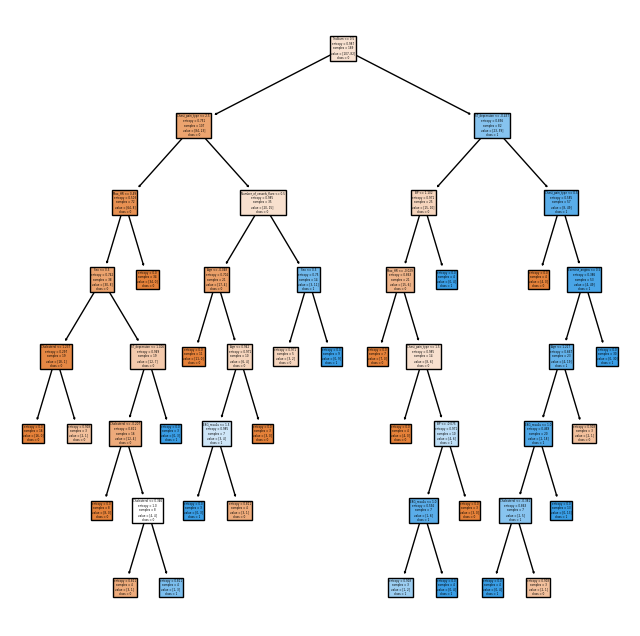

In [54]:
#Auto hyperparameter fine-tuning
dtc = DecisionTreeClassifier()
max_depth = list(range(10,30,10))
min_samples_split = list(range(5,10))
min_samples_leaf = list(range(2,10))
min_impurity_decrease = np.arange(1,5)/1000

parameters = {'criterion':['gini','entropy'],
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'min_impurity_decrease':min_impurity_decrease}
gcv = GridSearchCV(estimator=dtc, 
                   param_grid=parameters) 
gcv.fit(x_train, y_train) # train each model of varying parameters
print(gcv.best_params_) # shows the best combination of the varying parameters


dtc = DecisionTreeClassifier(**gcv.best_params_) 

dtc.fit(x_train, y_train)
plot_tree_with_feature_class(dtc, x_train, y_train)

In [55]:
#prediction and performance]

dtc_y_pred_train = dtc.predict(x_train) 
dtc_y_pred_test = dtc.predict(x_test)
print(metrics.confusion_matrix(y_test, dtc_y_pred_test))
print("---" * 10 )
print("Accuracy Score:", metrics.accuracy_score(y_test,dtc_y_pred_test))
print("Precision:", metrics.precision_score(y_test,dtc_y_pred_test))
print("Recall:", metrics.recall_score(y_test,dtc_y_pred_test))
print("F1 score:", metrics.f1_score(y_test,dtc_y_pred_test))

[[36  7]
 [10 28]]
------------------------------
Accuracy Score: 0.7901234567901234
Precision: 0.8
Recall: 0.7368421052631579
F1 score: 0.7671232876712328


The model had strong balance in accuracy and precision scores, however given the nature of the business (healthcare), a higher recall score is desirable, and whilst 73.6% is reasonably good, it might not be optimal.

#### 8.3 Artifical Neural Network (ANN)

Aritifical Neural Network was trained using GridSearchCV to find optimal boundaries such that the model can be optimised for heart disease prediction.

In [ ]:
clf = MLPClassifier(solver='sgd',
                    activation='logistic',
                    random_state=1)

learning_rates = np.arange(1,5)/10 # this generates a sequence: 0.1, 0.2,... 0.5
print(learning_rates)

# one hidden layer with 5 to 10 nodes
# all combinations of two numbers i and j; i and j are both 5,6,7,8,9
# all combinations of three numbers i, j, k, which can all be 5,6,7,8,9
# MAKE SURE THERE IS NO EXTRA SPACE BEHIND THE '\'
hidden_layer_sizes = [(i,) for i in range(5,10)] + \
                     [(i,j) for i in range(5,10) for j in range(5, 10)] + \
                     [(i,j,k) for i in range(5,10) for j in range(5, 10) for k in range(5, 10)]
print(hidden_layer_sizes)

# use a dictionary to contain the two parameters that will vary
# we try every value generated above for each param
parameters = {'learning_rate_init':learning_rates,
              'hidden_layer_sizes':hidden_layer_sizes}

# GridSearchCV takes in the model with the fixed parameters, and also takes in the varying parameters as a dictionary
gcv = GridSearchCV(estimator=clf, 
                   param_grid=parameters) 
gcv.fit(x_train, y_train) # train each model of varying parameters
print(gcv.best_params_) # shows the best combination of the varying parameters
clf = MLPClassifier(solver='sgd',
                    activation='logistic',
                    random_state=1,
                    **gcv.best_params_)  
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

#(Open AI 2024)

[0.1 0.2 0.3 0.4]
[(5,), (6,), (7,), (8,), (9,), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (5, 5, 5), (5, 5, 6), (5, 5, 7), (5, 5, 8), (5, 5, 9), (5, 6, 5), (5, 6, 6), (5, 6, 7), (5, 6, 8), (5, 6, 9), (5, 7, 5), (5, 7, 6), (5, 7, 7), (5, 7, 8), (5, 7, 9), (5, 8, 5), (5, 8, 6), (5, 8, 7), (5, 8, 8), (5, 8, 9), (5, 9, 5), (5, 9, 6), (5, 9, 7), (5, 9, 8), (5, 9, 9), (6, 5, 5), (6, 5, 6), (6, 5, 7), (6, 5, 8), (6, 5, 9), (6, 6, 5), (6, 6, 6), (6, 6, 7), (6, 6, 8), (6, 6, 9), (6, 7, 5), (6, 7, 6), (6, 7, 7), (6, 7, 8), (6, 7, 9), (6, 8, 5), (6, 8, 6), (6, 8, 7), (6, 8, 8), (6, 8, 9), (6, 9, 5), (6, 9, 6), (6, 9, 7), (6, 9, 8), (6, 9, 9), (7, 5, 5), (7, 5, 6), (7, 5, 7), (7, 5, 8), (7, 5, 9), (7, 6, 5), (7, 6, 6), (7, 6, 7), (7, 6, 8), (7, 6, 9), (7, 7, 5), (7, 7, 6), (7, 7, 7), (7, 7, 8), (7, 7, 9), (7, 8, 5), (7, 8, 6), (7, 8, 7), (7,

In [ ]:
#predictions and performances
ANN_y_pred_train =clf.predict(x_train) 
ANN_y_pred_test = clf.predict(x_test)
print(metrics.confusion_matrix(y_test, ANN_y_pred_test))
print("---" * 10 )
print("Accuracy Score:", metrics.accuracy_score(y_test,ANN_y_pred_test))
print("Precision:", metrics.precision_score(y_test,ANN_y_pred_test))
print("Recall:", metrics.recall_score(y_test,ANN_y_pred_test))
print("F1 score:", metrics.f1_score(y_test,ANN_y_pred_test))

The ANN model had equally good precision and recall scores, as well as a high accuracy rate, which is a desirable trait for the healthcare company. Given the 84% recall score, it is a desirable output as it suggests that the model is able to correctly predict true positives 84% of the cases. In healthcare settings, a balanced precision and recall score is good, in that it is able to mnimise both missed cases and incorrect diagnosis. 

The notebook further explored ensemble methods to see whether higher performance models can be implemented to achieve greater accuracy. In this case, XGB Classifier and Stacked Model was explored. 

#### 8.4 Random Forest Model

In [ ]:
param_grid = { 
    'n_estimators': [25, 50,100], 
    'max_depth': [3, 5, 7], 
    'max_leaf_nodes': [3, 6, 9], 
} 
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_) 

In [ ]:
model_grid = RandomForestClassifier(max_depth=7, 
                                    max_leaf_nodes=9, 
                                    n_estimators=50) 
model_grid.fit(x_train, y_train) 

In [ ]:
#predictions and performances
RFM_y_pred_train =model_grid.predict(x_train) 
RFM_y_pred_test = model_grid.predict(x_test)
print(metrics.confusion_matrix(y_test, RFM_y_pred_test))
print("---" * 10 )
print("Accuracy Score:", metrics.accuracy_score(y_test,RFM_y_pred_test))
print("Precision:", metrics.precision_score(y_test,RFM_y_pred_test))
print("Recall:", metrics.recall_score(y_test,RFM_y_pred_test))
print("F1 score:", metrics.f1_score(y_test,RFM_y_pred_test))

This model had a signficant precision score, but the recall score was relatively low, despite using parameter searches, and therefore further options were explored to see whether there other models would be more optimal.

#### 8.5 XGB Classifier

XGB Classifiers are useful, in that it uses gradient boosting on weaker classifiers such as decision trees and iteratively choose which trees are of greater signficance, and so was deemed as a suitable model to train for this dataset. 

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

print("XGBoost Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("XGBoost Recall:", metrics.recall_score(y_test, y_pred_xgb))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance for XGBoost model
feature_importance = xgb_model.feature_importances_
sns.barplot(x=feature_importance, y=x_train.columns)
plt.title('Feature Importance from XGBoost')
plt.show()

#(Open AI 2024)

#### 8.6 Stacked Model 

The stacked model was utilised as it provides a seamless balance between model bias and variances relative to complex models (OpenAI 2024). The stacked model is an ensemble approach that combines the outputs of the various models, in this case, the Logistic regression, Decision Tree Classifier and the Random Forest Classifier to create a more accurate prediction that individual models would otherwise not be able to achieve.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(n_estimators=100))
]
stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacked_model.fit(x_train, y_train)
y_pred_stacked = stacked_model.predict(x_test)

print("Stacked Model Accuracy:", metrics.accuracy_score(y_test, y_pred_stacked))
print("Stacked Model Recall:", metrics.recall_score(y_test, y_pred_stacked))

Overall the Stacked Model achieved the highest recall score, which is a proliferating output and is apt for the healthcare business in accurately detecting heart disease amidst patients. Compared to  the models individually, the stacked model achieved balanced scores across the board.

#### 8.7 ADA-Boost Classifier

The notebook further explored AdaBoost Classifier - another ensemble model - to explore a robust model that counteracts errors from other weak classifiers (OpenAI, 2024). 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
adaboost_model.fit(x_train, y_train)
y_pred_adaboost = adaboost_model.predict(x_test)

print("AdaBoost Accuracy:", metrics.accuracy_score(y_test, y_pred_adaboost))
print("AdaBoost Recall:", metrics.recall_score(y_test, y_pred_adaboost))

Overall the model performed exceptionally well, with strong accuracy scores and satisfactory recall scores. The AdaBoost is an overall good model in comparison to singular models such as decision tree, in that it handles noise in data more effectively, especially in complex datasets, which in healthcare settings would be apt given the wide range of features involved. 

#### **Step 9: Comparison**

For better comparison, the following section tables and graphically represents each score of each model against one another. Additionally, the notebook computed cross validation scores to test the models amongst splitted groups (K folds) to iteratively test scores. 

In [ ]:
# Creating the performance table
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Neural Network', 'XGBoost', 'Stacked Model', 'AdaBoost Model'],
    'Accuracy': [
        metrics.accuracy_score(y_test, log_y_pred_test),
        metrics.accuracy_score(y_test, dtc_y_pred_test),
        metrics.accuracy_score(y_test, ANN_y_pred_test ),
        metrics.accuracy_score(y_test, y_pred_xgb),
        metrics.accuracy_score(y_test, y_pred_stacked),
        metrics.accuracy_score(y_test, y_pred_adaboost)
    ],
    'Recall': [
        metrics.recall_score(y_test, log_y_pred_test),
        metrics.recall_score(y_test, dtc_y_pred_test),
        metrics.recall_score(y_test, ANN_y_pred_test),
        metrics.recall_score(y_test, y_pred_xgb),
        metrics.recall_score(y_test, y_pred_stacked),
        metrics.recall_score(y_test, y_pred_adaboost)
    ],
    'Precision': [
        metrics.precision_score(y_test, log_y_pred_test),
        metrics.precision_score(y_test, dtc_y_pred_test),
        metrics.precision_score(y_test, ANN_y_pred_test),
        metrics.precision_score(y_test, y_pred_xgb),
        metrics.precision_score(y_test, y_pred_stacked),
        metrics.precision_score(y_test, y_pred_adaboost)
    ],
    'F1 Score': [
        metrics.f1_score(y_test, log_y_pred_test),
        metrics.f1_score(y_test, dtc_y_pred_test),
        metrics.f1_score(y_test, ANN_y_pred_test),
        metrics.f1_score(y_test, y_pred_xgb),
        metrics.f1_score(y_test, y_pred_stacked),
        metrics.f1_score(y_test, y_pred_adaboost)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

results_df.set_index('Model').plot(kind='bar', figsize=(14, 8))
plt.title('Performance Comparison Across Models')
plt.ylabel('Score')
plt.show

#(Open AI 2024) 

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train, y_train)  # This creates a scikit-learn object 

models = {
    'Logistic Regression': logreg_model, 
    'Decision Tree': dtc,          
    'Neural Network': clf,          
    'XGBoost': xgb_model,                 
    'Stacked Model': stacked_model,       
    'AdaBoost Model': adaboost_model      
}
print ("Accuracy scores of models")
print ("-----" *5)
for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} 5-Fold Cross-Validation Recall: {scores.mean():.4f} ± {scores.std():.4f}")
print ("-----" *5)

print ("Precision scores of models")
print ("-----" *5)
for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='precision')
    print(f"{model_name} 5-Fold Cross-Validation Recall: {scores.mean():.4f} ± {scores.std():.4f}")
print ("-----" *5)

print ("Recall scores of models")
print ("-----" *5)
for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='recall')
    print(f"{model_name} 5-Fold Cross-Validation Recall: {scores.mean():.4f} ± {scores.std():.4f}")
print ("-----" *5)

#(OpenAI 2024)

Upon comparison, and reflection on both the graph and the cross validation scores, it can be seen that the Stacked model was the most optimal model to accurately detect True positives, which in a healthcare settign is vital. Contrariwise, ADABoost demonstrated the highest precision score, and could be a potential substitute in clinical settings, where the cost of detecting False Positives would be relatively insignificant (OpenAI 2024). 

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming `y_test` and predicted probabilities (`y_prob`) are available for each model
models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dtc,
    'Neural Network': clf,
    'XGBoost': xgb_model,
    'Stacked Model': stacked_model,
    'AdaBoost': adaboost_model
}

plt.figure(figsize=(12, 8))

for name, model in models.items():
    # Compute probabilities and ROC curve
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# (OpenAI 2024)

Additionally, an ROC-AUC curve was generated, and upon reflection it was seen that the ADA Model as expected had the best AUC scores, followed closely with Stacked Model and Neural Network (OpenAI 2024). Overall, all the models performed exceptionally well in distinguishing between presence and absence of heart disease in patients. 

### Recommendations and Conclusion

It would be ideal to highlight the model stacks depending on the business case. The ADABoost Model demonstrated the highest AUC, suggesting promiment performance in accurate predictions. For cases where minimising false positives are more significant, the ADABoost model would be more applicable. Similarly, in cases where recall scores or ability to correctly detect true positives are significant, employing ANN or Stacked Model would be ideal (OpenAI 2024). 

Overall, each models had their benefits and flaws. Some had stronger accuracy, others had strong recall scores, whilst others struck a good balance between scores. For the healthcare sector it would be advisable to utilise each model for its benefits, in different context.

For instance, in primary screening, the ANN, or Stacked Model might be desirable given their ability to navigate complex datasets and their reliable balance between precision and recall scores. 

Contrariwise, the AdaBoost can be utilised as a reinforced model, in the sense that its high precision scores would be able to accurately confirm the presence of heart diseases upon initial diagnosis, lowering the probabilities of misdiagnosis and further wastage of reousrces. 

Furthermore, Logistic Regression and Decision tree would be ideal models to deploy when deliberating on future decision makings due to its interpretability. In business cases, when dealing shareholders of the business, it would be good to present findings from these models to all stakeholders for a comprehensive decision making foundation. 

Perpetually training models and optimising its performance would improve both patient outcomes and business returns. Additionally, accurate predictions would also signficantly help in effectively allocating resources such that the business can focus on improvings its offerings and creating a stronger data analytic structure.


### References

##### OpenAI 2024, ChatGPT [Large language model], Retrieved October 23, 2024, from https://chat.openai.com/chat

##### OpenAI 2024, ChatGPT [Large language model], Retrieved November 2, 2024, from https://chat.openai.com/chat

##### OpenAI 2024, ChatGPT [Large language model], Retrieved November 6, 2024, from https://chat.openai.com/chat

##### OpenAI 2024, ChatGPT [Large language model], Retrieved November 11, 2024, from https://chat.openai.com/chat

##### Mohapatra, D, Bhoi, S.K, Mallick, C, Jena, K.K and Mishra, S 2022. "Distribution preserving train-test split directed ensemble classifier for heart disease prediction". *International Journal of Information Technology* 14(4), pp.1763-1769.

##### Sadar, U, Agarwal, P, Parveen, S, Jain, S, & Obaid, A.J 2023. "Heart disease prediction using machine learning techniques". *International Conference on Data Science, Machine Learning and Applications (pp. 551-560)*. Singapore: Springer Nature Singapore.